In [9]:
import requests

In [15]:


url = "https://api.polygon.io/v2/aggs/ticker/C:EURUSD/range/1/minute/2022-01-01/2023-01-01"
api_key = "X42eL3JIBolLyILkDYmg9tseTpO1KBMZ"

# Opción 1: Pasar la clave de API en la cadena de consulta
params = {
    "apiKey": api_key
}

response = requests.get(url, params=params)


In [20]:
response.json()['ticker']

'C:EURUSD'

In [21]:
data = response.json()

# Verificar si el campo 'campo_deseado' existe en el objeto JSON
if 'next_url' in data:
    # El campo existe, puedes acceder a su valor
    valor = data['next_url']
    print(valor)
else:
    # El campo no existe
    print("El campo no existe en el objeto JSON")


El campo no existe en el objeto JSON


In [22]:
data = response.json()

# Verificar si el campo 'campo_deseado' existe en el objeto JSON
if 'next_url' in data:
    # El campo existe, puedes acceder a su valor
    valor = data['ticker']
    print(valor)
else:
    # El campo no existe
    print("El campo no existe en el objeto JSON")


C:EURUSD


In [24]:
import time
url = "https://api.polygon.io/v2/aggs/ticker/C:EURUSD/range/1/minute/2022-01-01/2023-01-01"
api_key = "X42eL3JIBolLyILkDYmg9tseTpO1KBMZ"
lista = []
while True:
    # Realizar alguna tarea aquí      


    # Opción 1: Pasar la clave de API en la cadena de consulta
    params = {
        "apiKey": api_key
    }

    response = requests.get(url, params=params)
    data = response.json()
    lista = lista + data['results']
    
    # Verificar la condición de salida
    if 'next_url' not in data:
        break
    else:
        url = data['next_url']

    # Pausa de 12.5 segundos
    time.sleep(12.5)


In [26]:
# Crear DataFrame
history = pd.DataFrame(lista)

In [ ]:
history.head()

: 

In [29]:
history['datetime'] = pd.to_datetime(history['t'], unit='ms')


In [68]:
df = history

In [70]:
# Convertir la columna "datetime" a tipo DateTime si no lo está
df['datetime'] = pd.to_datetime(df['t'], unit='ms')

# Establecer la columna "datetime" como el índice del DataFrame
df.set_index('datetime', inplace=True)

# Imprimir el DataFrame con el nuevo índice
print(df)

                     v      vw        o        c        h        l  \
datetime                                                             
2022-01-02 20:01:00  1  1.1357  1.13568  1.13568  1.13568  1.13568   
2022-01-02 21:17:00  1  1.1360  1.13595  1.13595  1.13595  1.13595   
2022-01-02 21:42:00  1  1.1365  1.13650  1.13650  1.13650  1.13650   
2022-01-02 22:00:00  1  1.1365  1.13650  1.13650  1.13650  1.13650   
2022-01-02 22:06:00  3  1.1365  1.13659  1.13648  1.13659  1.13648   
...                 ..     ...      ...      ...      ...      ...   
2023-01-01 21:42:00  1  1.0679  1.06788  1.06788  1.06788  1.06788   
2023-01-01 22:00:00  1  1.0679  1.06788  1.06788  1.06788  1.06788   
2023-01-01 22:07:00  1  1.0681  1.06810  1.06810  1.06810  1.06810   
2023-01-01 23:22:00  1  1.0696  1.06960  1.06960  1.06960  1.06960   
2023-01-01 23:47:00  1  1.0793  1.07930  1.07930  1.07930  1.07930   

                                 t  n  
datetime                               
2022-01-0

In [67]:

import pytz


In [71]:
timezone_ny = pytz.timezone('America/New_York')
df.index = df.index.tz_localize(pytz.UTC).tz_convert(timezone_ny)


In [72]:
# Convertir el índice a tipo DateTime si no lo está
# df.index = pd.to_datetime(df.index)

# Filtrar los valores de 0 a 5 del día
df_filtered = df.between_time('00:00', '05:00')

# Imprimir el DataFrame filtrado
print(df_filtered)

                             v      vw        o        c        h        l  \
datetime                                                                     
2022-01-03 00:00:00-05:00   60  1.1340  1.13401  1.13390  1.13411  1.13390   
2022-01-03 00:01:00-05:00   33  1.1340  1.13400  1.13390  1.13405  1.13380   
2022-01-03 00:02:00-05:00   20  1.1340  1.13401  1.13394  1.13401  1.13390   
2022-01-03 00:03:00-05:00   19  1.1340  1.13390  1.13397  1.13401  1.13380   
2022-01-03 00:04:00-05:00   45  1.1340  1.13398  1.13400  1.13410  1.13390   
...                        ...     ...      ...      ...      ...      ...   
2022-12-30 04:56:00-05:00  192  1.0661  1.06618  1.06607  1.06640  1.06580   
2022-12-30 04:57:00-05:00  187  1.0659  1.06608  1.06571  1.06620  1.06569   
2022-12-30 04:58:00-05:00  207  1.0656  1.06571  1.06568  1.06580  1.06540   
2022-12-30 04:59:00-05:00  238  1.0655  1.06566  1.06546  1.06568  1.06520   
2022-12-30 05:00:00-05:00  174  1.0655  1.06545  1.06554  1.0656

In [73]:
df_filtered[:-100]

,v,vw,o,c,h,l,t,n
datetime,,,,,,,,
2022-01-03 00:00:00-05:00,60,1.1340,1.13401,1.13390,1.13411,1.13390,1641186000000,60
2022-01-03 00:01:00-05:00,33,1.1340,1.13400,1.13390,1.13405,1.13380,1641186060000,33
2022-01-03 00:02:00-05:00,20,1.1340,1.13401,1.13394,1.13401,1.13390,1641186120000,20
2022-01-03 00:03:00-05:00,19,1.1340,1.13390,1.13397,1.13401,1.13380,1641186180000,19
2022-01-03 00:04:00-05:00,45,1.1340,1.13398,1.13400,1.13410,1.13390,1641186240000,45
...,...,...,...,...,...,...,...,...
2022-12-30 03:16:00-05:00,129,1.0660,1.06595,1.06600,1.06614,1.06580,1672388160000,129
2022-12-30 03:17:00-05:00,169,1.0662,1.06610,1.06620,1.06632,1.06598,1672388220000,169
2022-12-30 03:18:00-05:00,165,1.0663,1.06625,1.06632,1.06640,1.06600,1672388280000,165


In [74]:
# Supongamos que tienes un DataFrame llamado df con las columnas v, vw, o, c, h, l, t, n.

# Crear un diccionario de mapeo para cambiar los nombres de las columnas
column_mapping = {
     'o': 'Open',
    'v': 'Volume',
    'vw': 'Vwap',
   
    'c': 'Close',
    'h': 'High',
    'l': 'Low',
    't': 'Timestamp',
    'n': 'Trade_count'
}

# Renombrar las columnas utilizando el diccionario de mapeo
df_filtered = df_filtered.rename(columns=column_mapping)


In [75]:
# Convertir la columna de timestamp en el índice del DataFrame (si aún no lo está)
# df.set_index('timestamp', inplace=True)

# Resamplear las barras de un minuto a barras de 15 minutos
df_resampled = df_filtered.resample('15T').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum',
    'Trade_count': 'sum',
    'Vwap': 'mean'
})




In [76]:
df_resampled

,Open,High,Low,Close,Volume,Trade_count,Vwap
datetime,,,,,,,
2022-01-03 00:00:00-05:00,1.13401,1.13420,1.1337,1.13390,472,472,1.133987
2022-01-03 00:15:00-05:00,1.13399,1.13410,1.1335,1.13350,483,483,1.133847
2022-01-03 00:30:00-05:00,1.13367,1.13410,1.1335,1.13408,535,535,1.133700
2022-01-03 00:45:00-05:00,1.13407,1.13410,1.1335,1.13377,642,642,1.133927
2022-01-03 01:00:00-05:00,1.13379,1.13421,1.1336,1.13398,590,590,1.133920
...,...,...,...,...,...,...,...
2022-12-30 04:00:00-05:00,1.06711,1.06720,1.0661,1.06670,2517,2517,1.066567
2022-12-30 04:15:00-05:00,1.06684,1.06700,1.0655,1.06569,2480,2480,1.066293
2022-12-30 04:30:00-05:00,1.06573,1.06622,1.0651,1.06610,2171,2171,1.065727


In [77]:
df_resampled.dropna(inplace=True)

In [65]:
df_resampled

,Open,High,Low,Close,Volume,Trade_count,Vwap
datetime,,,,,,,
2022-01-03 00:00:00,1.13723,1.13752,1.13697,1.13704,335,335,1.137287
2022-01-03 00:15:00,1.13703,1.13708,1.13661,1.13661,505,505,1.136860
2022-01-03 00:30:00,1.13661,1.13680,1.13580,1.13622,663,663,1.136260
2022-01-03 00:45:00,1.13622,1.13633,1.13590,1.13616,669,669,1.136160
2022-01-03 01:00:00,1.13617,1.13643,1.13590,1.13620,597,597,1.136287
...,...,...,...,...,...,...,...
2022-12-30 04:15:00,1.06573,1.06590,1.06550,1.06581,987,987,1.065767
2022-12-30 04:30:00,1.06583,1.06610,1.06550,1.06550,772,772,1.065827
2022-12-30 04:45:00,1.06572,1.06580,1.06510,1.06552,1065,1065,1.065467


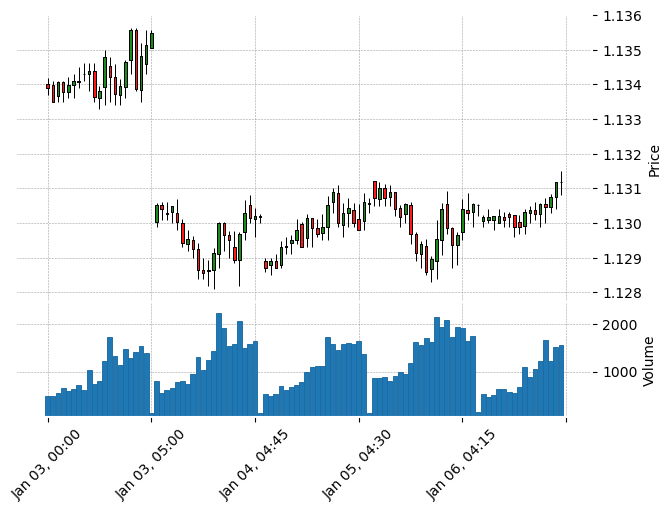

In [78]:
import pandas as pd
import mplfinance as mpf

# Supongamos que tienes un DataFrame llamado df con las columnas deseadas: v, vw, o, c, h, l, t, n.
# Asegúrate de que la columna "t" sea de tipo DateTime.

# Configurar el DataFrame para usar "t" como índice
# df.set_index('t', inplace=True)

# Crear un objeto de estilo de gráfico de velas
style = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mpf.make_marketcolors(up='g', down='r'))

# Crear un gráfico de velas con los valores deseados
mpf.plot(df_resampled[:100], type='candle', style=style, volume=True, ylabel='Price', ylabel_lower='Volume')


In [12]:
url2 = "https://api.polygon.io/v2/aggs/ticker/C:EURUSD/range/1/minute/1641461940000/2023-01-01?cursor=bGltaXQ9NTAwMCZzb3J0PWFzYw"
api_key = "X42eL3JIBolLyILkDYmg9tseTpO1KBMZ"

# Opción 1: Pasar la clave de API en la cadena de consulta
params = {
    "apiKey": api_key
}

response2 = requests.get(url, params=params)
response2.json()

{'ticker': 'C:EURUSD',
 'queryCount': 5000,
 'resultsCount': 5000,
 'adjusted': True,
 'results': [{'v': 1,
   'vw': 1.1357,
   'o': 1.13568,
   'c': 1.13568,
   'h': 1.13568,
   'l': 1.13568,
   't': 1641153660000,
   'n': 1},
  {'v': 1,
   'vw': 1.136,
   'o': 1.13595,
   'c': 1.13595,
   'h': 1.13595,
   'l': 1.13595,
   't': 1641158220000,
   'n': 1},
  {'v': 1,
   'vw': 1.1365,
   'o': 1.1365,
   'c': 1.1365,
   'h': 1.1365,
   'l': 1.1365,
   't': 1641159720000,
   'n': 1},
  {'v': 1,
   'vw': 1.1365,
   'o': 1.1365,
   'c': 1.1365,
   'h': 1.1365,
   'l': 1.1365,
   't': 1641160800000,
   'n': 1},
  {'v': 3,
   'vw': 1.1365,
   'o': 1.13659,
   'c': 1.13648,
   'h': 1.13659,
   'l': 1.13648,
   't': 1641161160000,
   'n': 3},
  {'v': 19,
   'vw': 1.1366,
   'o': 1.13652,
   'c': 1.13679,
   'h': 1.13679,
   'l': 1.13645,
   't': 1641161220000,
   'n': 19},
  {'v': 9,
   'vw': 1.1367,
   'o': 1.13671,
   'c': 1.13673,
   'h': 1.13679,
   'l': 1.13671,
   't': 1641161280000,
   'n

In [23]:
response2.json()['results']

[{'v': 1,
  'vw': 1.1357,
  'o': 1.13568,
  'c': 1.13568,
  'h': 1.13568,
  'l': 1.13568,
  't': 1641153660000,
  'n': 1},
 {'v': 1,
  'vw': 1.136,
  'o': 1.13595,
  'c': 1.13595,
  'h': 1.13595,
  'l': 1.13595,
  't': 1641158220000,
  'n': 1},
 {'v': 1,
  'vw': 1.1365,
  'o': 1.1365,
  'c': 1.1365,
  'h': 1.1365,
  'l': 1.1365,
  't': 1641159720000,
  'n': 1},
 {'v': 1,
  'vw': 1.1365,
  'o': 1.1365,
  'c': 1.1365,
  'h': 1.1365,
  'l': 1.1365,
  't': 1641160800000,
  'n': 1},
 {'v': 3,
  'vw': 1.1365,
  'o': 1.13659,
  'c': 1.13648,
  'h': 1.13659,
  'l': 1.13648,
  't': 1641161160000,
  'n': 3},
 {'v': 19,
  'vw': 1.1366,
  'o': 1.13652,
  'c': 1.13679,
  'h': 1.13679,
  'l': 1.13645,
  't': 1641161220000,
  'n': 19},
 {'v': 9,
  'vw': 1.1367,
  'o': 1.13671,
  'c': 1.13673,
  'h': 1.13679,
  'l': 1.13671,
  't': 1641161280000,
  'n': 9},
 {'v': 1,
  'vw': 1.1367,
  'o': 1.13672,
  'c': 1.13672,
  'h': 1.13672,
  'l': 1.13672,
  't': 1641161340000,
  'n': 1},
 {'v': 2,
  'vw': 1.136